# NYC Public School Regents Report

School DBN: School District Borough Number 

District: Assigned Number To School Based On Geographical Location

Borough:{K: 'Brooklyn, X: 'Bronx', Q: 'Queens', M: 'Manhattan', R: 'Staten Island' }

School Name: Institution Name

School Level: Grade Levels Taught By The School

Regents Exam: Statewide Standardize Exam

Year: The Year of Testing and Examination

Total Tested: Total Amount of Students Tested For Exam

Mean Score: Average Performance of Group of Students on Specifies Assesment

## Initial Exploration and Data Tidying

In [758]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [759]:
#Importing Dataframe
#Telling the computer to replace the values 's' and 'na' with NaN.
missing_values = ['s', 'na']
df = pd.read_csv(
    'https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
    na_values=missing_values
)
df


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
 13 

In [761]:
df['Number Scoring CR'].sort_values()

102470    0.0
135506    0.0
135505    0.0
135504    0.0
36008     0.0
         ... 
212326    NaN
212327    NaN
212328    NaN
212329    NaN
212330    NaN
Name: Number Scoring CR, Length: 212331, dtype: float64

In [762]:
df.isnull().sum()

School DBN                          0
School Name                         0
School Level                        0
Regents Exam                       10
Year                                0
Total Tested                        0
Mean Score                      75222
Number Scoring Below 65         75222
Percent Scoring Below 65        75222
Number Scoring 65 or Above      75222
Percent Scoring 65 or Above     75222
Number Scoring 80 or Above      75222
Percent Scoring 80 or Above     75222
Number Scoring CR              142680
Percent Scoring CR             142680
dtype: int64

In [763]:
df.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331.000000,212331.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,69651.000000,69651.000000
mean,2015.956069,49.364200,65.998967,25.140297,41.933632,46.443516,58.067855,20.506655,22.692027,29.959340,36.213730
std,0.799726,93.023576,11.288883,37.155199,28.405737,85.187123,28.405517,56.301578,26.160987,68.306798,31.092605
min,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,5.000000,58.300000,5.000000,17.500000,8.000000,36.000000,1.000000,2.200000,2.000000,8.800000
50%,2016.000000,20.000000,65.400000,13.000000,40.200000,21.000000,59.800000,5.000000,12.500000,9.000000,29.000000
75%,2017.000000,57.000000,73.400000,31.000000,64.000000,52.000000,82.500000,18.000000,34.500000,31.000000,58.800000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


In [764]:
#Displaying dataframe columns
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [765]:
#Dropping the columns 'Number Scoring CR' and 'Percent Scoring CR' from the dataframe.
drop_cols = ['Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, axis=1, inplace=True)

#Creating new columns "District" and "Borough" based on indentifying string nums. from "School DBN"
df['District'] = df['School DBN'].str[:2]
df['Borough'] = df['School DBN'].str[2:3]

#Reordering and reindexing columns and displaying new dataframe
new_cols = ['School DBN', 'District', 'Borough','School Name', 'School Level', 'Regents Exam', 'Year',
            'Total Tested', 'Mean Score', 'Number Scoring Below 65',
            'Percent Scoring Below 65', 'Number Scoring 65 or Above',
            'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
            'Percent Scoring 80 or Above']
df = df.reindex(columns=new_cols)

df


,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
2,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
3,01M140,01,M,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,01,M,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,84,X,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,84,X,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,84,X,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,84,X,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [766]:
#Showings all the rows where values are NaN in 'Mean Score'
null_rows = df[df['Mean Score'].isna()]
null_rows

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M140,01,M,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,01,M,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,01M188,01,M,P.S. 188 The Island School,K-8,Common Core English,2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,01M188,01,M,P.S. 188 The Island School,K-8,Living Environment,2017,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,84,X,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,84,X,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,84,X,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,84,X,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [767]:
null_rows['Borough'].value_counts()

K    24951
X    19340
M    17298
Q    11785
R     1848
Name: Borough, dtype: int64

In [768]:
# Confirmed all values where 'Mean Score' was NaN had equal amount of missing values for all following columns
null_rows.isnull().sum()

School DBN                         0
District                           0
Borough                            0
School Name                        0
School Level                       0
Regents Exam                       2
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65        75222
Percent Scoring Below 65       75222
Number Scoring 65 or Above     75222
Percent Scoring 65 or Above    75222
Number Scoring 80 or Above     75222
Percent Scoring 80 or Above    75222
dtype: int64

In [769]:
# Dropping all the rows with missing values.
df.dropna(inplace = True)

In [770]:
print(f'The shape of this dataframe is {df.shape}')

The shape of this dataframe is (137101, 15)


In [796]:
df.value_counts('Borough')

Borough
K    38694
X    34711
M    31196
Q    27848
R     4652
dtype: int64

In [772]:
df_subset = df.sort_values('Mean Score', ascending = False).head(70_420)
df_subset.value_counts('Borough')

Borough
K    18276
M    18081
Q    17557
X    13708
R     2798
dtype: int64

In [798]:
df.groupby(['Borough', 'Regents Exam']).mean()

C:\Users\jadaj\AppData\Local\Temp\ipykernel_9996\2500864306.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Borough', 'Regents Exam']).mean()


Year  Total Tested  \
Borough Regents Exam                                                 
K       Algebra2/Trigonometry            2015.655148     63.465803   
        Common Core Algebra              2016.068538     73.771827   
        Common Core Algebra2             2016.543744     66.698024   
        Common Core English              2016.158188     81.662364   
        Common Core Geometry             2016.097753     76.665747   
...                                              ...           ...   
X       Living Environment               2016.013593     56.347135   
        Physical Settings/Chemistry      2015.996215     35.772142   
        Physical Settings/Earth Science  2016.026252     38.309774   
        Physical Settings/Physics        2015.990637     40.080524   
        U.S. History and Government      2016.026765     55.059393   

                                         Mean Score  Number Scoring Below 65  \
Borough Regents Exam                                                           
K       Algebra2/Trigonometry             53.866883                31.126710   
        Common Core Algebra               66.604891                28.653005   
        Common Core Algebra2              62.259172                21.213547   
        Common Core English               68.747178                19.296887   
        Common Core Geometry              57.337919                38.603469   
...                                             ...                      ...   
X       Living Environment                65.442785                23.398787   
        Physical Settings/Chemistry       60.829447                16.273278   
        Physical Settings/Earth Science   59.428837                21.870759   
        Physical Settings/Physics         61.954307                11.243446   
        U.S. History and Government       68.077594                17.919704   

                                         Percent Scoring Below 65  \
Borough Regents Exam                                                
K       Algebra2/Trigonometry                           68.821598   
        Common Core Algebra                             39.655519   
        Common Core Algebra2                            50.806491   
        Common Core English                             29.974538   
        Common Core Geometry                            66.503902   
...                                                           ...   
X       Living Environment                              42.720473   
        Physical Settings/Chemistry                     61.933611   
        Physical Settings/Earth Science                 59.465428   
        Physical Settings/Physics                       52.274532   
        U.S. History and Government                     37.152154   

                                         Number Scoring 65 or Above  \
Borough Regents Exam                                                  
K       Algebra2/Trigonometry                             32.339093   
        Common Core Algebra                               45.118822   
        Common Core Algebra2                              45.484478   
        Common Core English                               62.365477   
        Common Core Geometry                              38.062278   
...                                                             ...   
X       Living Environment                                32.948348   
        Physical Settings/Chemistry                       19.498864   
        Physical Settings/Earth Science                   16.439015   
        Physical Settings/Physics                         28.837079   
        U.S. History and Government                       37.139689   

                                         Percent Scoring 65 or Above  \
Borough Regents Exam                                                   
K       Algebra2/Trigonometry                              31.179698   
        Common Core Algebra                               

In [774]:
year_2014 = df[df['Year'] == 2014]
year_2015 = df[df['Year'] == 2015]
year_2016 = df[df['Year'] == 2016]
year_2017 = df[df['Year'] == 2017]

## Year 2014

In [775]:
year_2014

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above


Year 2014 has no input values so it will be excluded from this analysis

## Year 2015

In [776]:
year_2015

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
1,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
5,01M140,01,M,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0
8,01M184,01,M,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9
12,01M188,01,M,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0
20,01M292,01,M,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212289,84X704,84,X,KIPP Academy Charter School,K-12 all grades,Physical Settings/Physics,2015,20,67.8,10.0,50.0,10.0,50.0,3.0,15.0
212294,84X704,84,X,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,24,80.8,0.0,0.0,24.0,100.0,14.0,58.3
212295,84X704,84,X,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,44,84.8,1.0,2.3,43.0,97.7,34.0,77.3
212324,84X717,84,X,Icahn Charter School,K-8,Living Environment,2015,8,76.5,1.0,12.5,7.0,87.5,2.0,25.0


In [777]:
year_2015_subset = year_2015[year_2015['Mean Score'] >= 65.0].sort_values('Mean Score', ascending= False)
year_2015_subset

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
152301,04M555,04,M,Central Park East High School,High school,Common Core English,2015,8,98.3,0.0,0.0,8.0,100.0,8.0,100.0
166452,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2015,49,98.2,0.0,0.0,49.0,100.0,49.0,100.0
116426,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2015,44,97.7,0.0,0.0,44.0,100.0,44.0,100.0
61991,04M555,04,M,Central Park East High School,High school,Common Core English,2015,22,97.7,0.0,0.0,22.0,100.0,22.0,100.0
90415,25Q525,25,Q,Townsend Harris High School,High school,U.S. History and Government,2015,41,97.6,0.0,0.0,41.0,100.0,41.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156476,07X547,07,X,New Explorers High School,High school,Integrated Algebra,2015,70,65.0,26.0,37.1,44.0,62.9,4.0,5.7
157004,07X670,07,X,Health Opportunities High School,High school,Living Environment,2015,77,65.0,28.0,36.4,49.0,63.6,9.0,11.7
103144,01M509,01,M,Marta Valle High School,High school,Global History and Geography,2015,72,65.0,25.0,34.7,47.0,65.3,10.0,13.9
103045,01M448,01,M,University Neighborhood High School,High school,Physical Settings/Earth Science,2015,28,65.0,13.0,46.4,15.0,53.6,3.0,10.7


In [778]:
year_2015_subset.value_counts('Borough')

Borough
K    6424
M    6235
Q    5989
X    4909
R     955
dtype: int64

In [779]:
year_2015.sort_values('Mean Score', ascending= False).tail(23_411).value_counts('Borough')

Borough
X    7411
K    7158
M    4651
Q    3542
R     649
dtype: int64

In [800]:
sorted_Mean = year_2015.sort_values('Mean Score', ascending= False)
sorted_Mean[['School Name', 'District']].reset_index()

,index,School Name,District
0,152301,Central Park East High School,04
1,166452,High School of American Studies at Lehman College,10
2,61991,Central Park East High School,04
3,116426,High School of American Studies at Lehman College,10
4,90415,Townsend Harris High School,25
...,...,...,...
47918,79858,Brooklyn High School for Law and Technology,16
47919,121955,Brooklyn High School for Law and Technology,16
47920,68817,DreamYard Preparatory School,09
47921,177384,Brooklyn High School for Law and Technology,16


In [781]:
year_2015.groupby(['Borough', 'Regents Exam']).mean()

C:\Users\jadaj\AppData\Local\Temp\ipykernel_9996\353118757.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_2015.groupby(['Borough', 'Regents Exam']).mean()


Year  Total Tested  Mean Score  \
Borough Regents Exam                                                        
K       Algebra2/Trigonometry            2015.0     70.673633   53.810450   
        Common Core Algebra              2015.0     61.997691   62.428868   
        Common Core English              2015.0     64.185145   69.298708   
        Common Core Geometry             2015.0     72.289773   58.256392   
        English                          2015.0     77.505486   67.164420   
...                                         ...           ...         ...   
X       Living Environment               2015.0     57.305378   65.566645   
        Physical Settings/Chemistry      2015.0     35.626932   60.981457   
        Physical Settings/Earth Science  2015.0     38.210191   60.107389   
        Physical Settings/Physics        2015.0     42.766667   63.566111   
        U.S. History and Government      2015.0     57.457831   69.372048   

                                         Number Scoring Below 65  \
Borough Regents Exam                                               
K       Algebra2/Trigonometry                          33.871383   
        Common Core Algebra                            31.288106   
        Common Core English                            17.407966   
        Common Core Geometry                           35.622159   
        English                                        20.051724   
...                                                          ...   
X       Living Environment                             23.419334   
        Physical Settings/Chemistry                    16.790287   
        Physical Settings/Earth Science                21.321019   
        Physical Settings/Physics                      10.527778   
        U.S. History and Government                    16.947791   

                                         Percent Scoring Below 65  \
Borough Regents Exam                                                
K       Algebra2/Trigonometry                           68.240514   
        Common Core Algebra                             50.184700   
        Common Core English                             31.726372   
        Common Core Geometry                            65.661932   
        English                                         33.588871   
...                                                           ...   
X       Living Environment                              42.161844   
        Physical Settings/Chemistry                     61.159603   
        Physical Settings/Earth Science                 56.899363   
        Physical Settings/Physics                       48.156111   
        U.S. History and Government                     33.554859   

                                         Number Scoring 65 or Above  \
Borough Regents Exam                                                  
K       Algebra2/Trigonometry                             36.802251   
        Common Core Algebra                               30.709584   
        Common Core English                               46.777180   
        Common Core Geometry                              36.667614   
        English                                           57.453762   
...                                                             ...   
X       Living Environment                                33.886044   
        Physical Settings/Chemistry                       18.836645   
        Physical Settings/Earth Science                   16.889172   
        Physical Settings/Physics                         32.238889   
        U.S. History and Government                       40.510040   

                                         Percent Scoring 65 or Above  \
Borough Regents Exam                                                   
K       Algebra2/Trigonometry                              31.760772   
        Common Core Algebra                                49.816917   
        Common Core English                   

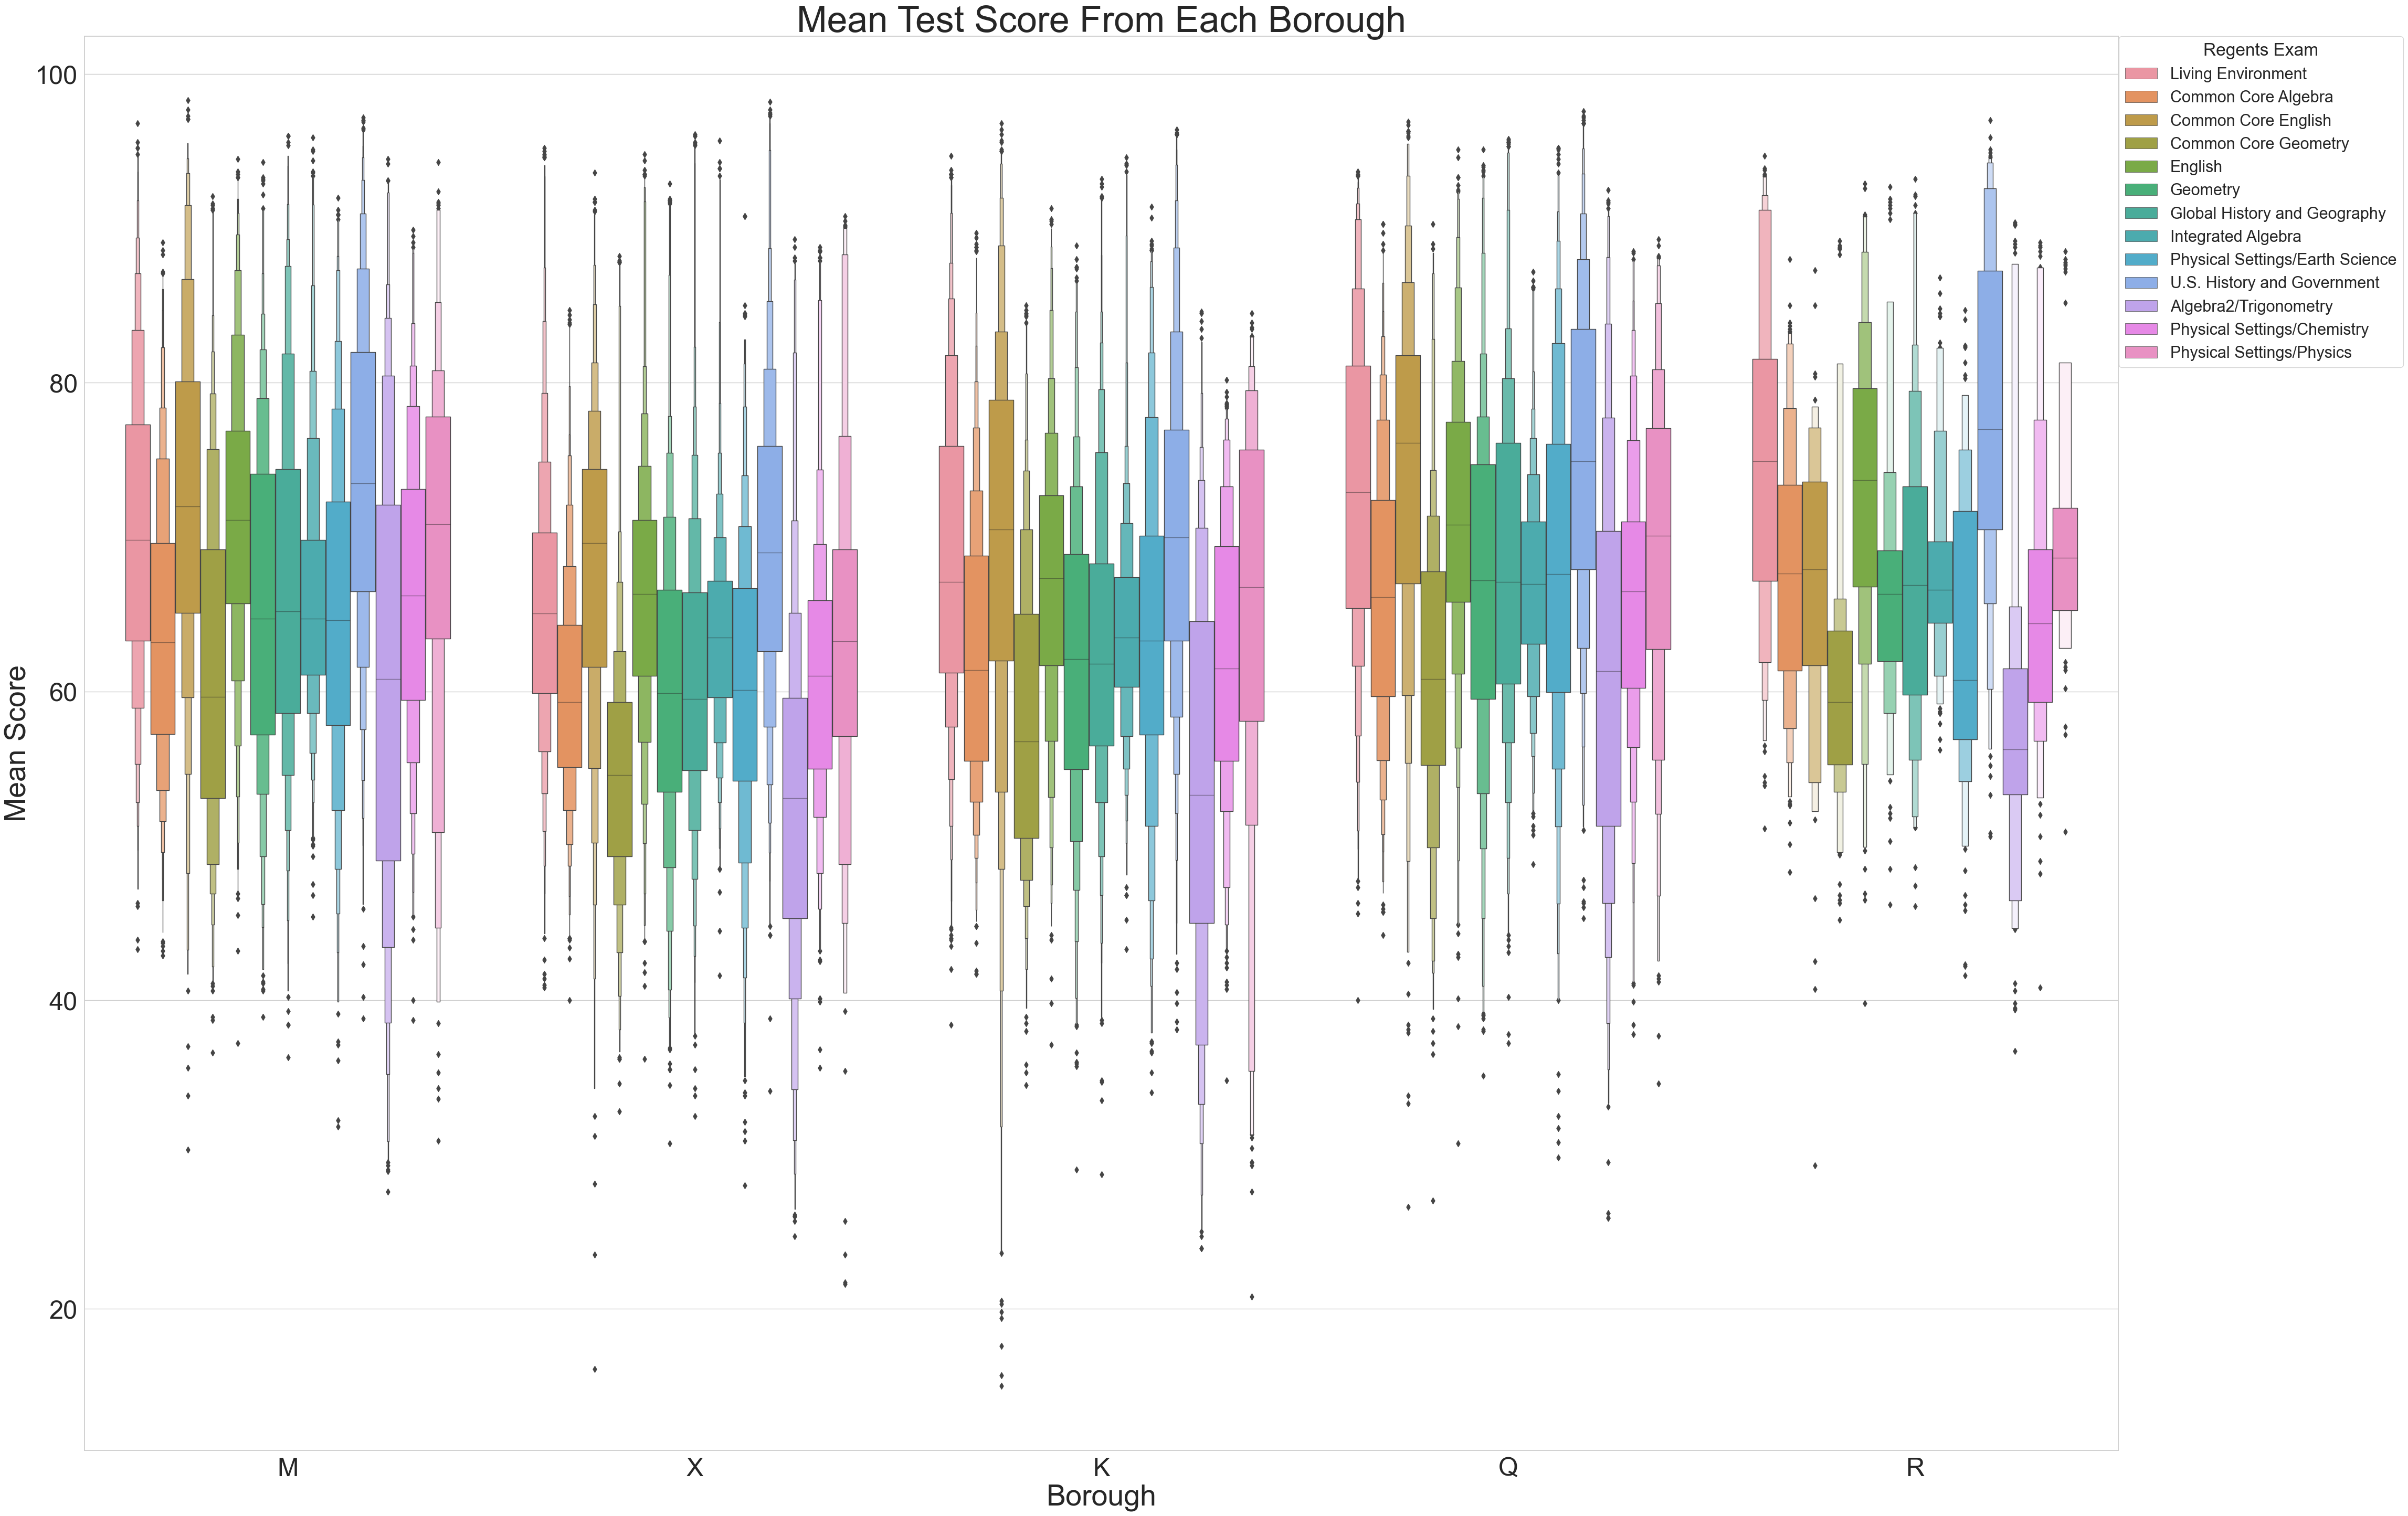

In [782]:
plt.figure(figsize= (50, 35))
sns.set(style = 'whitegrid', font_scale = 2)
sns.boxenplot(y = 'Mean Score', x = 'Borough', hue='Regents Exam', data = year_2015,
                 linewidth= 1).set(title= 'Mean Test Score From Each Borough')
plt.title('Mean Test Score From Each Borough', fontsize= 50)
plt.xlabel('Borough', fontsize= 40)
plt.ylabel('Mean Score', fontsize= 40)
plt.tick_params(axis= 'both', which= 'major', labelsize= 35)
plt.legend(title= 'Regents Exam', bbox_to_anchor=(1.14, 1), loc= 'upper right', borderaxespad=0)

## Year 2016

In [783]:
year_2016

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
2,01M034,01,M,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
6,01M140,01,M,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3
9,01M184,01,M,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7
13,01M188,01,M,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1
16,01M188,01,M,P.S. 188 The Island School,K-8,Living Environment,2016,17,62.1,9.0,52.9,8.0,47.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212297,84X704,84,X,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,55,83.7,4.0,7.3,51.0,92.7,39.0,70.9
212304,84X705,84,X,Family Life Academy Charter School,K-8,Living Environment,2016,8,77.0,1.0,12.5,7.0,87.5,4.0,50.0
212305,84X705,84,X,Family Life Academy Charter School,K-8,Living Environment,2016,15,76.3,1.0,6.7,14.0,93.3,5.0,33.3
212320,84X717,84,X,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0.0,0.0,8.0,100.0,7.0,87.5


In [801]:
sorted_Mean2 = year_2016.sort_values('Mean Score', ascending= False)
sorted_Mean2[['School Name', 'District']].reset_index()

,index,School Name,District
0,116428,High School of American Studies at Lehman College,10
1,166457,High School of American Studies at Lehman College,10
2,115923,Bronx High School of Science,10
3,7128,High School of American Studies at Lehman College,10
4,166455,High School of American Studies at Lehman College,10
...,...,...,...
47059,21952,Hudson High School of Learning Technologies,02
47060,186646,Life Academy High School for Film and Music,21
47061,53149,Renaissance Charter School,84
47062,125077,Performing Arts and Technology High School,19


In [785]:
year_2016_subset = year_2016[year_2016['Mean Score'] >= 65.0].sort_values('Mean Score', ascending = False)
year_2016_subset

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
116428,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2016,33,98.4,0.0,0.0,33.0,100.0,33.0,100.0
166457,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2016,38,97.8,0.0,0.0,38.0,100.0,37.0,97.4
115923,10X445,10,X,Bronx High School of Science,High school,U.S. History and Government,2016,333,97.6,0.0,0.0,333.0,100.0,333.0,100.0
7128,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2016,72,97.6,0.0,0.0,72.0,100.0,71.0,98.6
165482,10X445,10,X,Bronx High School of Science,High school,U.S. History and Government,2016,38,97.5,0.0,0.0,38.0,100.0,38.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43955,24Q485,24,Q,Grover Cleveland High School,High school,Common Core Algebra,2016,564,65.0,239.0,42.4,325.0,57.6,40.0,7.1
98984,84K473,84,K,Williamsburg Charter High School,High school,Physical Settings/Earth Science,2016,42,65.0,20.0,47.6,22.0,52.4,7.0,16.7
167340,11X288,11,X,Collegiate Institute for Math and Science,High school,Global History and Geography,2016,93,65.0,37.0,39.8,56.0,60.2,18.0,19.4
2332,02M655,02,M,Life Sciences Secondary School,Secondary School,Common Core Algebra2,2016,11,65.0,4.0,36.4,7.0,63.6,0.0,0.0


In [786]:
year_2016_subset.value_counts('Borough')

Borough
K    6242
M    6134
Q    5966
X    4676
R     899
dtype: int64

In [787]:
year_2016.sort_values('Mean Score', ascending= False).tail(23_147).value_counts('Borough')

Borough
X    7280
K    7027
M    4468
Q    3645
R     727
dtype: int64

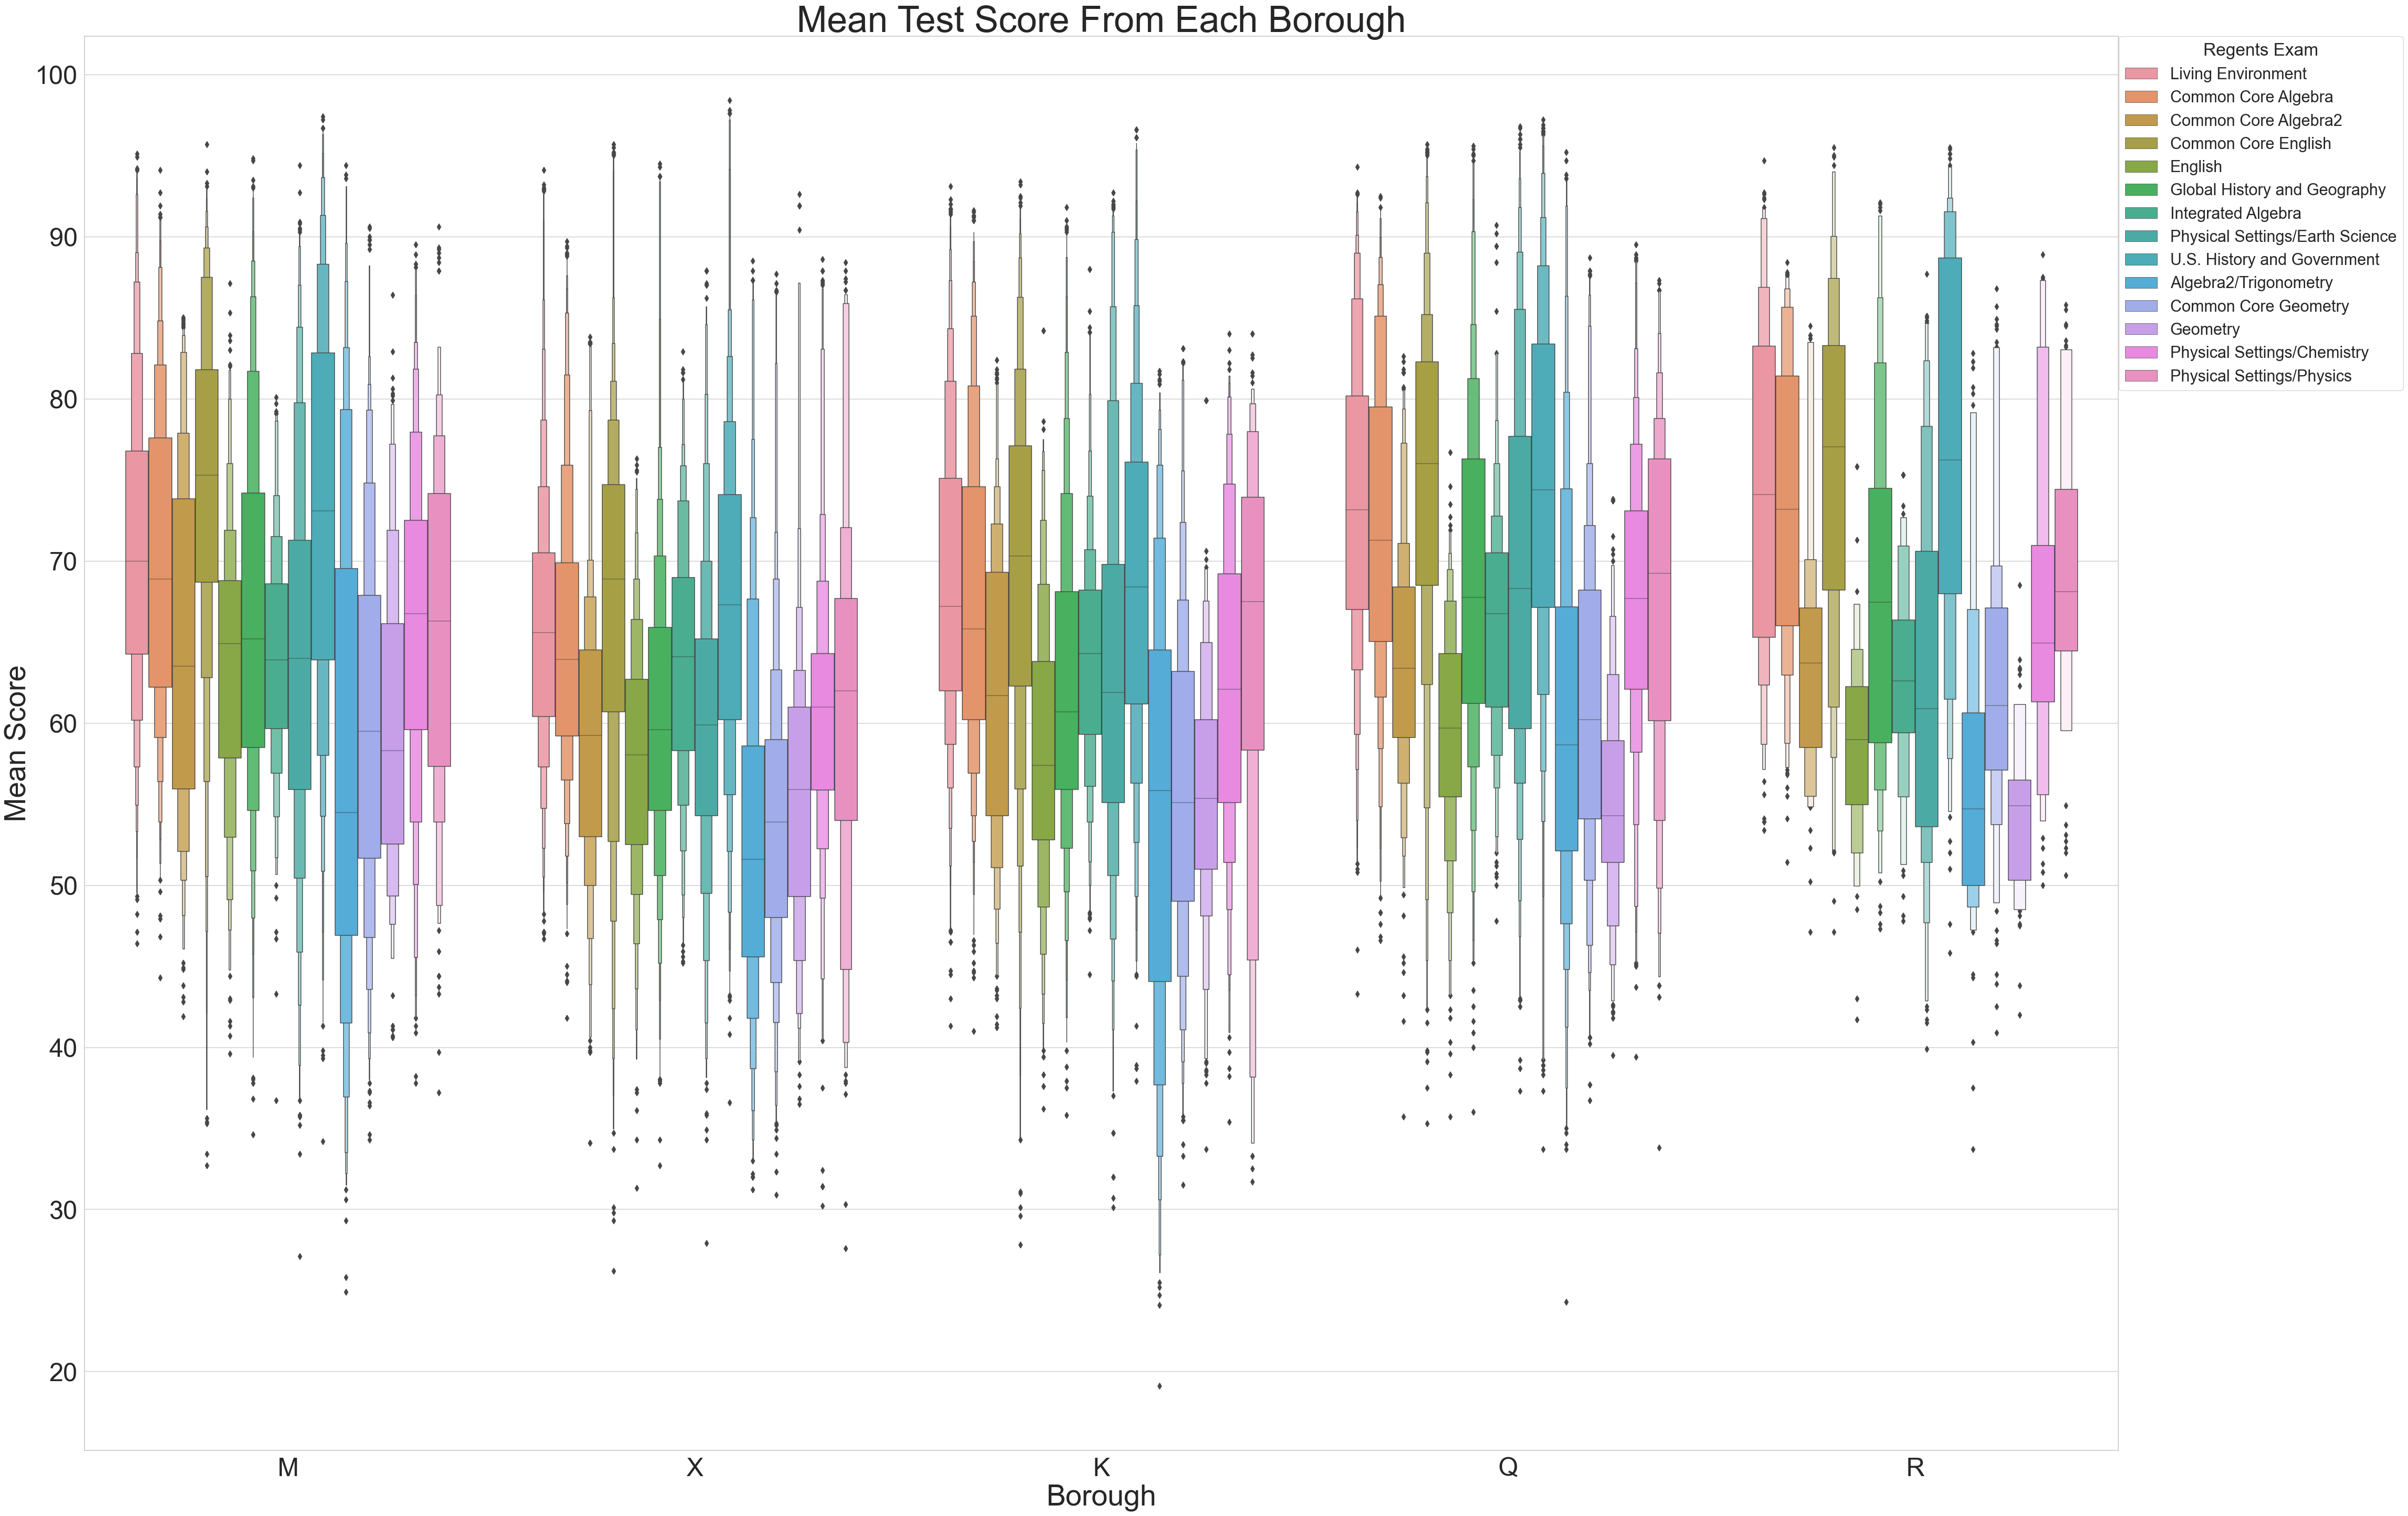

In [789]:
plt.figure(figsize= (50, 35))
sns.set(style = 'whitegrid', font_scale = 2)
sns.boxenplot(y = 'Mean Score', x = 'Borough', hue='Regents Exam', data = year_2016,
                 linewidth= 1).set(title= 'Mean Test Score From Each Borough')
plt.title('Mean Test Score From Each Borough', fontsize= 50)
plt.xlabel('Borough', fontsize= 40)
plt.ylabel('Mean Score', fontsize= 40)
plt.tick_params(axis= 'both', which= 'major', labelsize= 35)
plt.legend(title= 'Regents Exam', bbox_to_anchor=(1.14, 1), loc= 'upper right', borderaxespad=0)

## Year 2017

In [790]:
year_2017

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
7,01M140,01,M,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1
10,01M184,01,M,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3
11,01M184,01,M,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1.0,1.8,54.0,98.2,43.0,78.2
14,01M188,01,M,P.S. 188 The Island School,K-8,Common Core Algebra,2017,20,67.4,7.0,35.0,13.0,65.0,1.0,5.0
22,01M292,01,M,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212293,84X704,84,X,KIPP Academy Charter School,K-12 all grades,Physical Settings/Physics,2017,36,66.2,17.0,47.2,19.0,52.8,7.0,19.4
212300,84X704,84,X,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2017,58,82.5,4.0,6.9,54.0,93.1,37.0,63.8
212311,84X706,84,X,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0.0,0.0,15.0,100.0,12.0,80.0
212322,84X717,84,X,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.0,0.0,0.0,6.0,100.0,6.0,100.0


In [802]:
sorted_Mean3 = year_2017.sort_values('Mean Score', ascending= False)
sorted_Mean2[['School Name', 'District']].reset_index()

,index,School Name,District
0,116428,High School of American Studies at Lehman College,10
1,166457,High School of American Studies at Lehman College,10
2,115923,Bronx High School of Science,10
3,7128,High School of American Studies at Lehman College,10
4,166455,High School of American Studies at Lehman College,10
...,...,...,...
47059,21952,Hudson High School of Learning Technologies,02
47060,186646,Life Academy High School for Film and Music,21
47061,53149,Renaissance Charter School,84
47062,125077,Performing Arts and Technology High School,19


In [791]:
year_2017_subset = year_2017[year_2017['Mean Score'] >= 65.0].sort_values('Mean Score', ascending = False)
year_2017_subset

,School DBN,District,Borough,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
166460,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2017,15,98.7,0.0,0.0,15.0,100.0,15.0,100.0
166458,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2017,21,98.5,0.0,0.0,21.0,100.0,21.0,100.0
72560,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2017,6,98.5,0.0,0.0,6.0,100.0,6.0,100.0
116430,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2017,48,98.4,0.0,0.0,48.0,100.0,48.0,100.0
72559,10X696,10,X,High School of American Studies at Lehman College,High school,U.S. History and Government,2017,85,98.3,0.0,0.0,85.0,100.0,85.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147800,02M546,02,M,Academy for Software Engineering,High school,Common Core Algebra2,2017,6,65.0,2.0,33.3,4.0,66.7,0.0,0.0
117520,11X514,11,X,The Bronxwood Preparatory Academy,High school,Physical Settings/Earth Science,2017,28,65.0,13.0,46.4,15.0,53.6,4.0,14.3
86109,21K525,21,K,Edward R. Murrow High School,High school,Common Core Algebra2,2017,336,65.0,138.0,41.1,198.0,58.9,31.0,9.2
129904,25Q425,25,Q,John Bowne High School,High school,Physical Settings/Earth Science,2017,366,65.0,166.0,45.4,200.0,54.6,57.0,15.6


In [792]:
year_2017_subset.value_counts('Borough')

Borough
M    5840
K    5771
Q    5700
X    4308
R     959
dtype: int64

In [793]:
year_2017.sort_values('Mean Score', ascending= False).tail(19_536).value_counts('Borough')

Borough
X    6127
K    6072
M    3868
Q    3006
R     463
dtype: int64

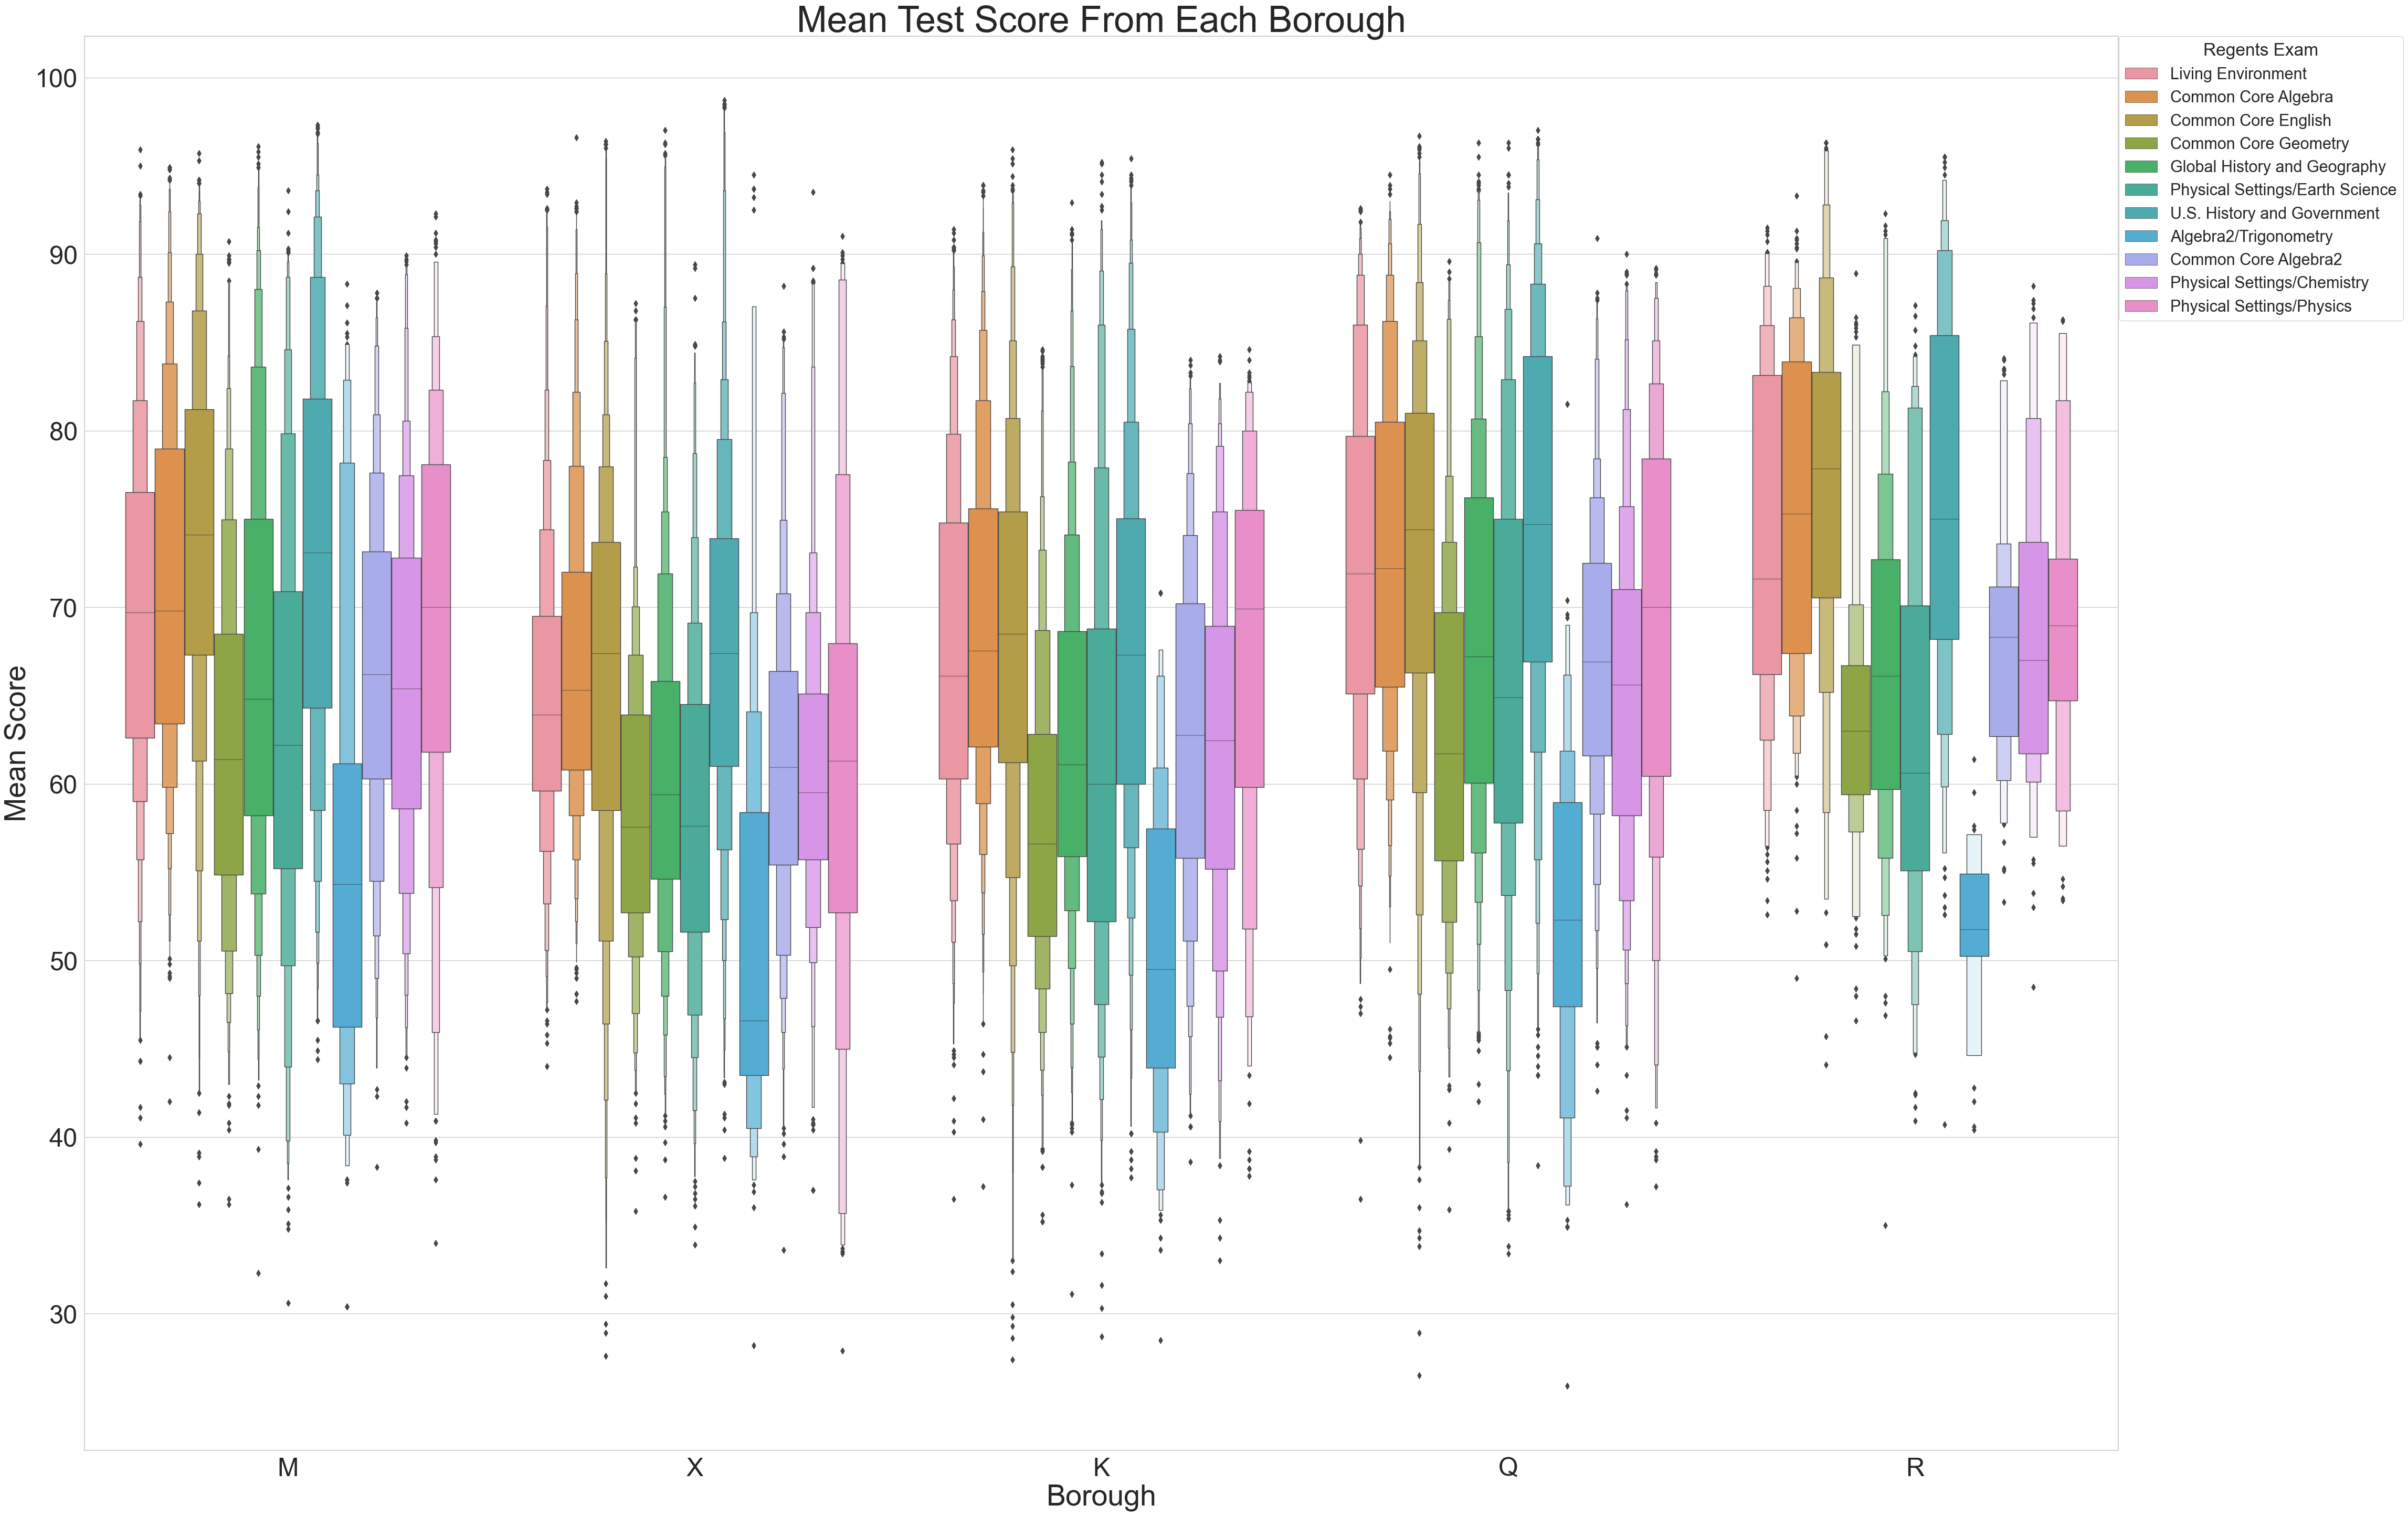

In [803]:
plt.figure(figsize= (50, 35))
sns.set(style = 'whitegrid', font_scale = 2)
sns.boxenplot(y = 'Mean Score', x = 'Borough', hue='Regents Exam', data = year_2017,
                 linewidth= 1).set(title= 'Mean Test Score From Each Borough')
plt.title('Mean Test Score From Each Borough', fontsize= 50)
plt.xlabel('Borough', fontsize= 40)
plt.ylabel('Mean Score', fontsize= 40)
plt.tick_params(axis= 'both', which= 'major', labelsize= 35)
plt.legend(title= 'Regents Exam', bbox_to_anchor=(1.14, 1), loc= 'upper right', borderaxespad=0)

## Final Thoughts

All boroughs had increased their passing rate average between the 2016-17 school year. Queens consistently performed the best, with the exception of 2017 placing 2 after Staten Island, 
with a >=63%-65% passing rate average from 2015-17. This could be due to Queens having the least amount of missing values, whereas, the Bronx and Brooklyn, respectively, were missing the most values and had the lowest lowest percentage passing rate average. Despite of the Bronx scoring some of the highest mean score, mainly from the High School of American Studies at Lehman College and Bronx High School of Science (specialized high schools), more than half of the borough had a failing rate average falling between 39-41% and ranked last consistently for all 3 years. Surprisingly, Manhattan did not rank the highest in grades and fell in the middle with slight improvement in the coming years. Staten Island had the smallest group size so they're averages are readily moved with differences in the hundreds and thousands, in 2015 they had a passing rate average of 59.5% which then dropped to 55% in the following year but then drastically increased to 67% in 2017 along with micro-increases from the other boroughs. 
Perhaps looking at the scores by which district is performing the highest/lowest along with other factors such as race, socioeconomic status, gender, teaching methods/student engagement can lend greater insight into student performance. 